In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [192]:
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [193]:
df.shape

(1460, 81)

In [194]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [196]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [197]:
cols_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
             'Fence', 'MiscFeature']

for col in cols_none:
    df[col] = df[col].fillna('None')
     ###################################################
    test_data[col] = test_data[col].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)


In [198]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
     ###################################################

test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [199]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [200]:
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

In [201]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
# ############################################################
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])


In [202]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

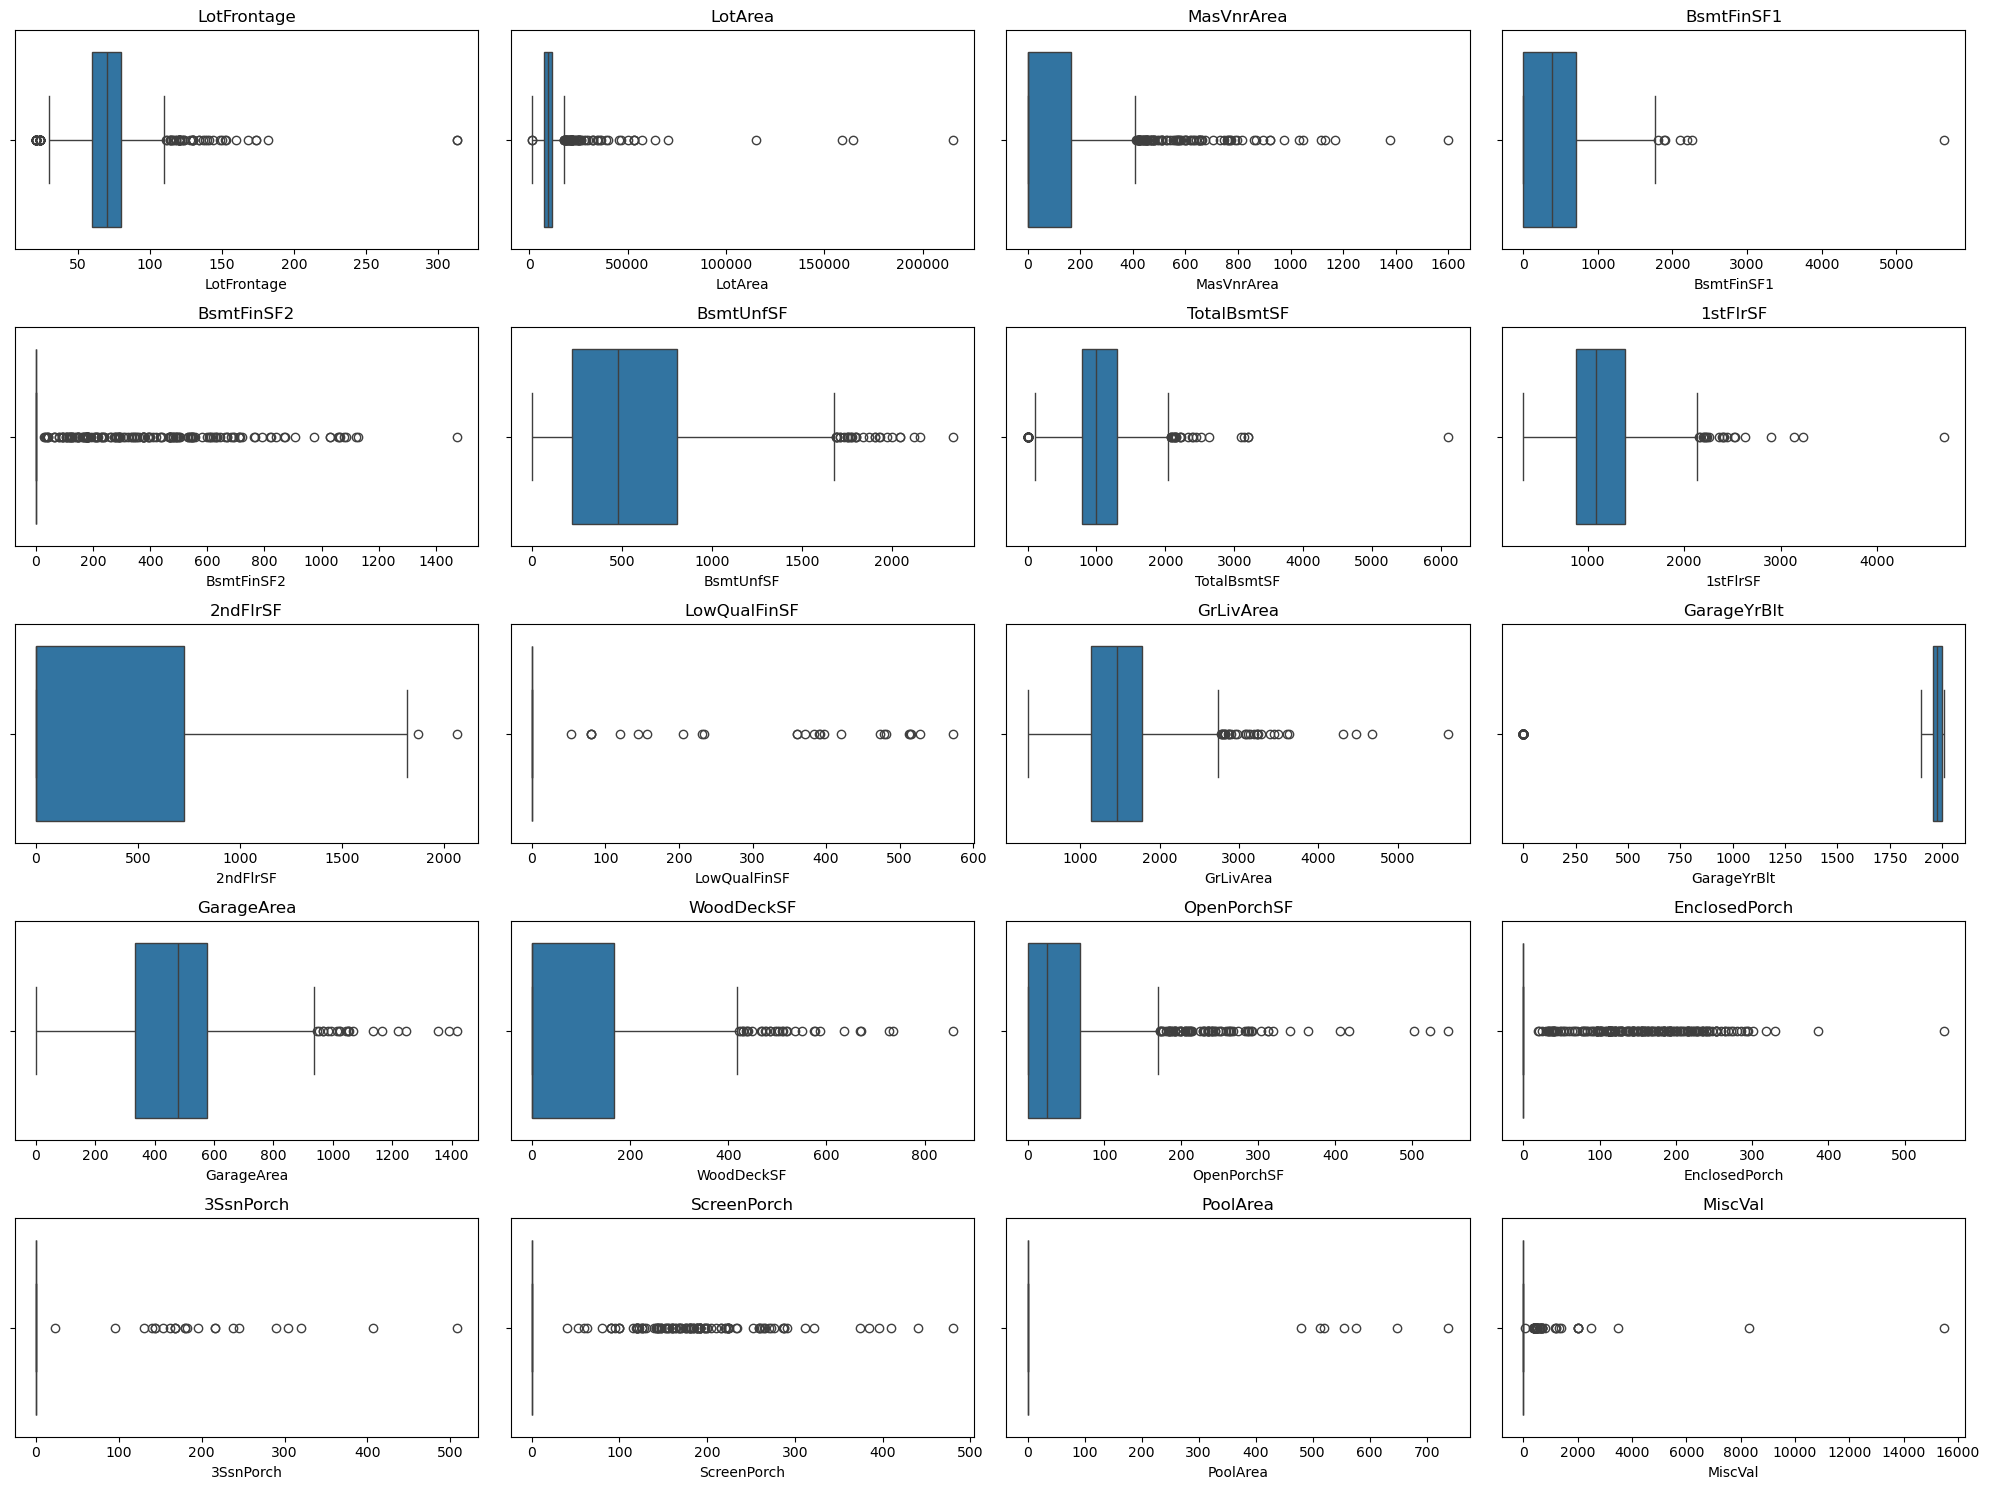

In [203]:
num_cols = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
]

plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [204]:
for col in num_cols:
    if col in df.columns:
        col_data = df[col].fillna(df[col].median())

        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        print(f"{col}: Namber of the Outlier = {len(outliers)}")


LotFrontage: Namber of the Outlier = 93
LotArea: Namber of the Outlier = 69
MasVnrArea: Namber of the Outlier = 98
BsmtFinSF1: Namber of the Outlier = 7
BsmtFinSF2: Namber of the Outlier = 167
BsmtUnfSF: Namber of the Outlier = 29
TotalBsmtSF: Namber of the Outlier = 61
1stFlrSF: Namber of the Outlier = 20
2ndFlrSF: Namber of the Outlier = 2
LowQualFinSF: Namber of the Outlier = 26
GrLivArea: Namber of the Outlier = 31
GarageYrBlt: Namber of the Outlier = 81
GarageArea: Namber of the Outlier = 21
WoodDeckSF: Namber of the Outlier = 32
OpenPorchSF: Namber of the Outlier = 77
EnclosedPorch: Namber of the Outlier = 208
3SsnPorch: Namber of the Outlier = 24
ScreenPorch: Namber of the Outlier = 116
PoolArea: Namber of the Outlier = 7
MiscVal: Namber of the Outlier = 52


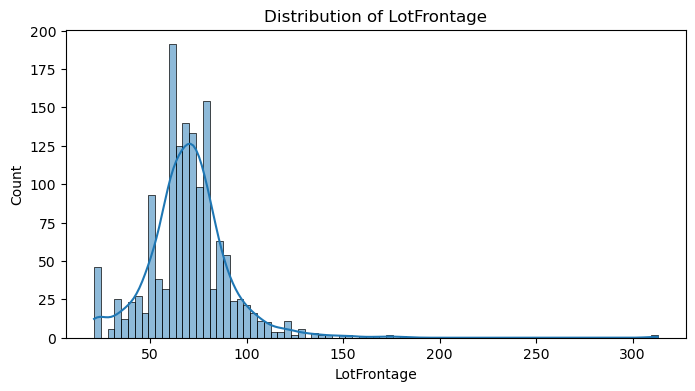

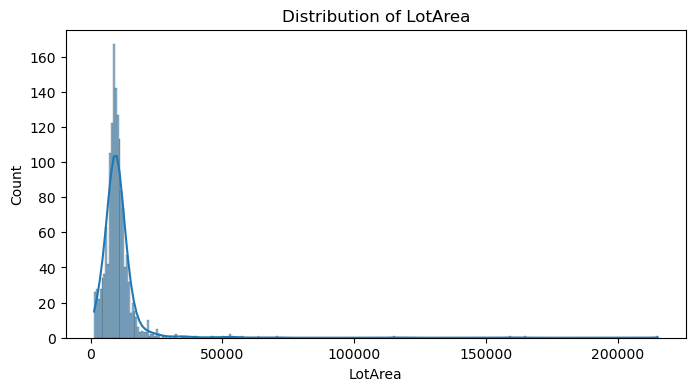

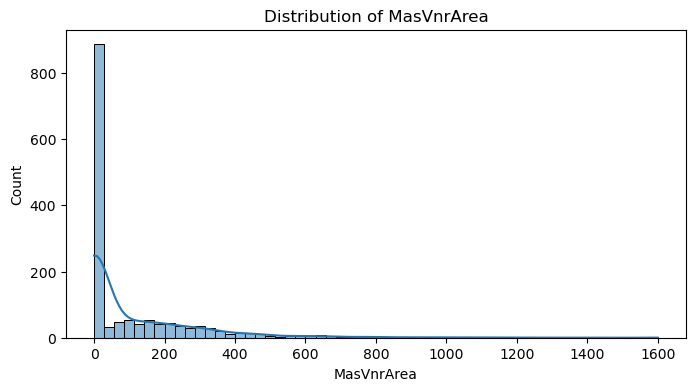

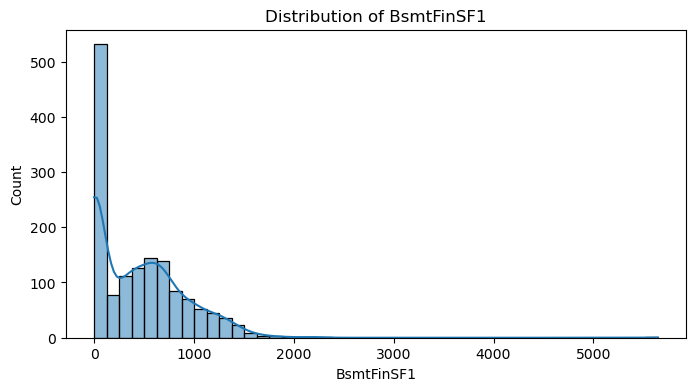

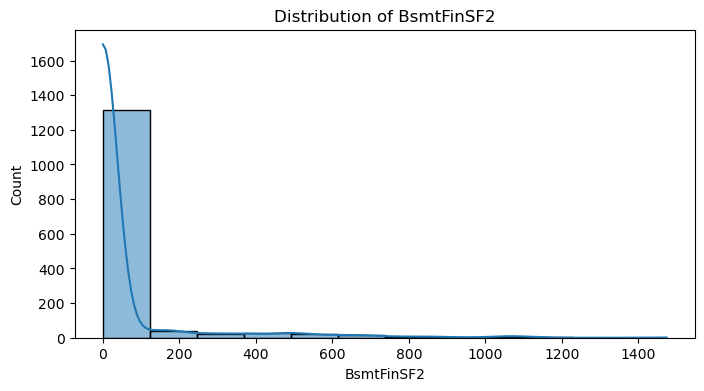

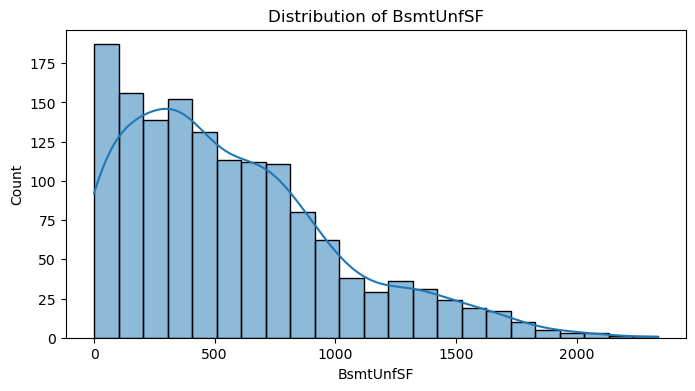

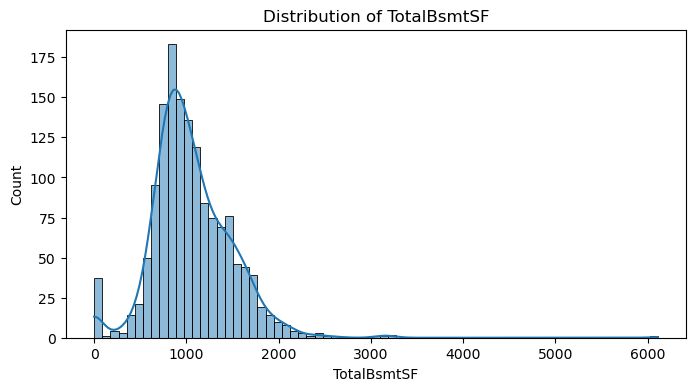

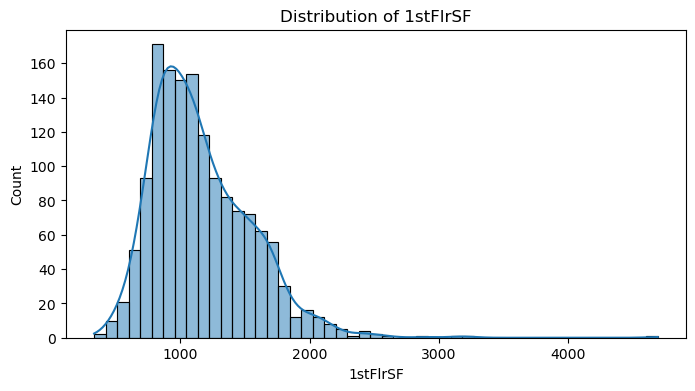

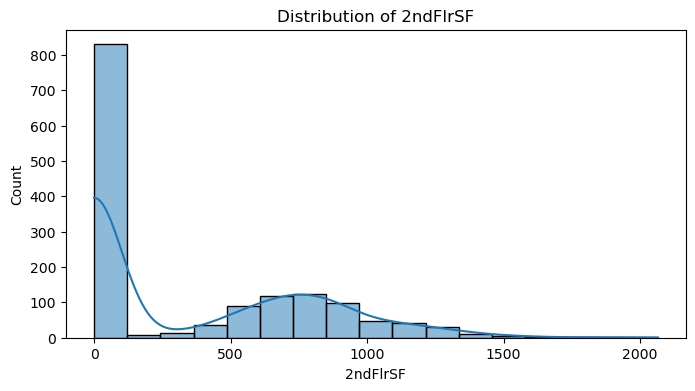

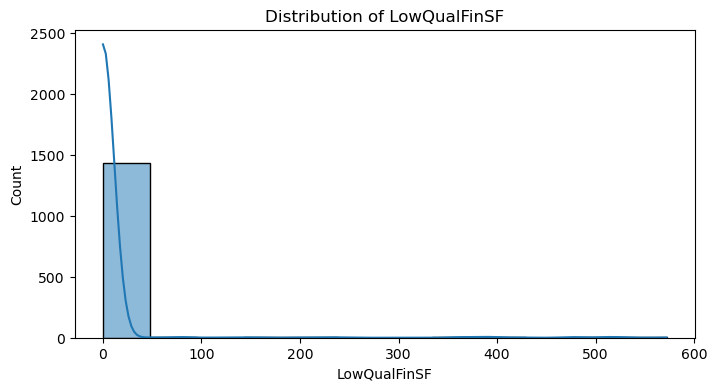

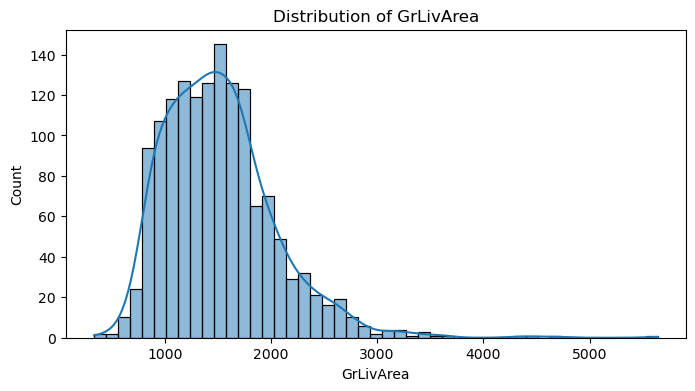

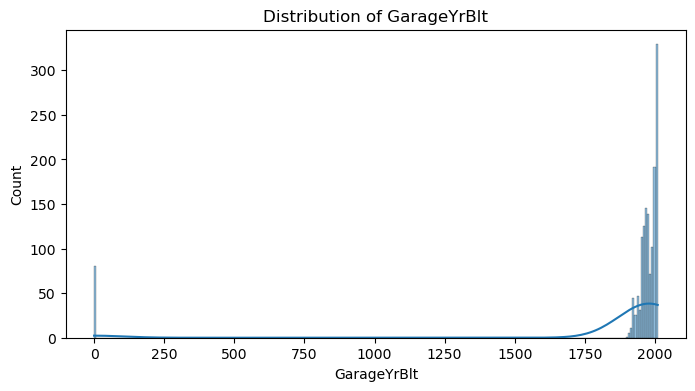

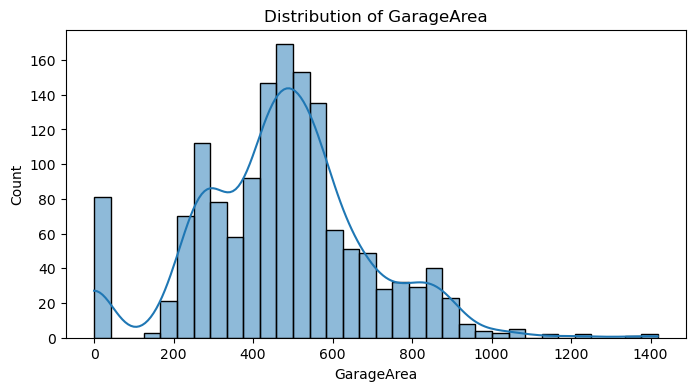

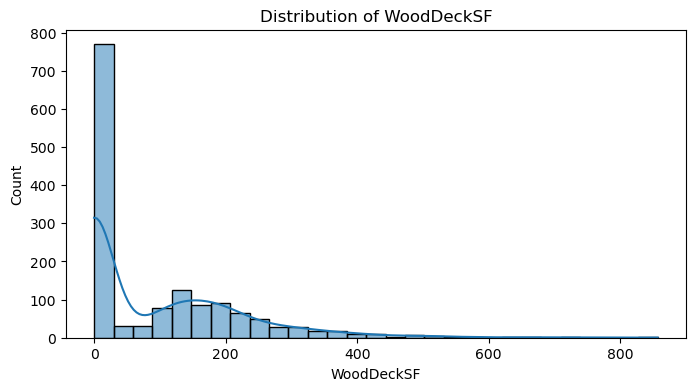

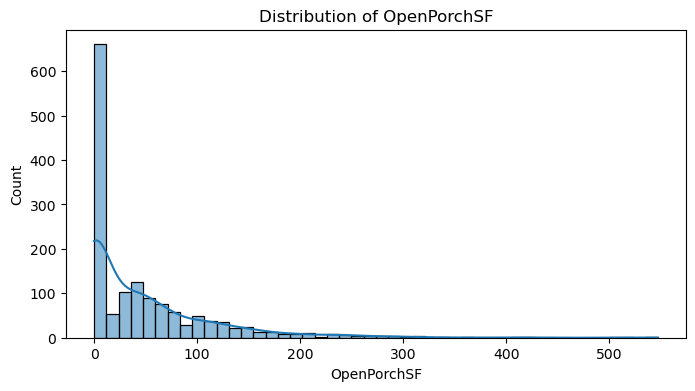

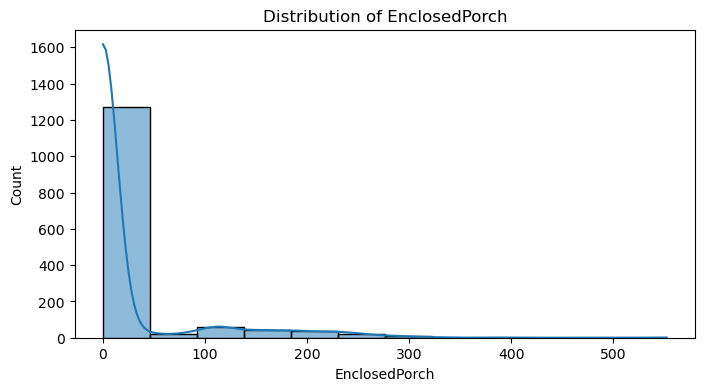

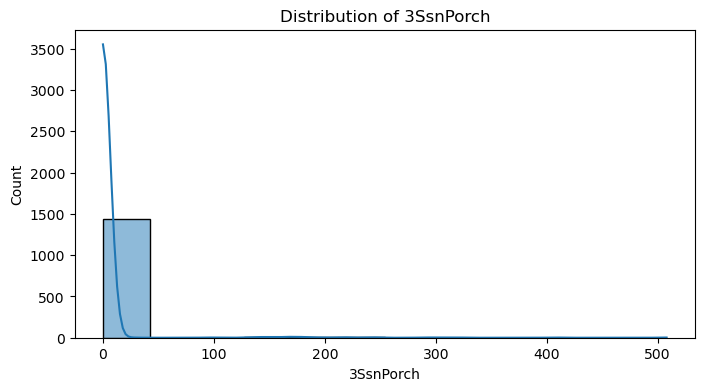

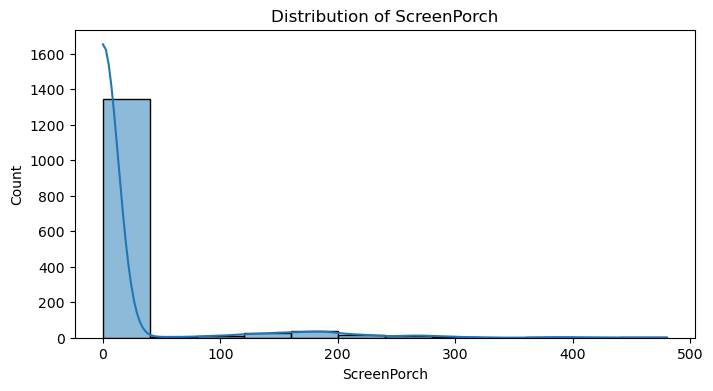

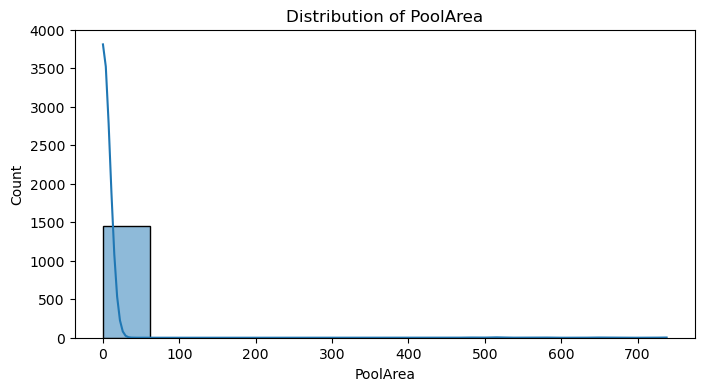

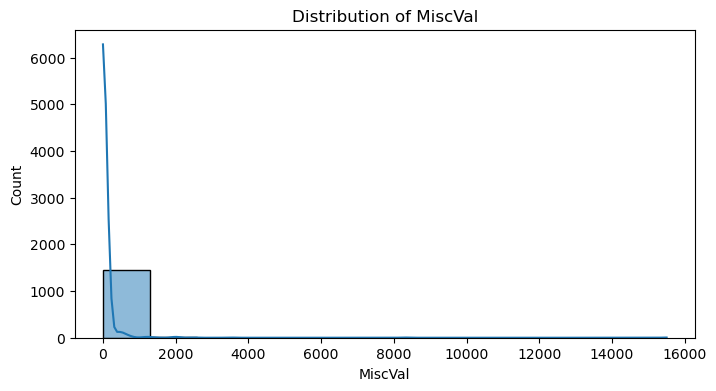

In [205]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

In [206]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
test_numeric_cols = test_data.select_dtypes(include=['int64', 'float64']).columns

def treat_outliers(df, cols, method='cap'):
    for col in cols:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            if method == 'cap':
                df[col] = np.where(df[col] > upper_bound, upper_bound,
                                   np.where(df[col] < lower_bound, lower_bound, df[col]))
            elif method == 'remove':
                df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

original_shape = df.shape

df = treat_outliers(df, numeric_cols, method='cap')
# #########################################################################
test_data = treat_outliers(test_data, test_numeric_cols, method='cap')

print(f"Original shape: {original_shape}")
print(f"After treating outliers: {df.shape}")




Original shape: (1460, 81)
After treating outliers: (1460, 81)


In [248]:
ordinal_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 
                'PoolQC', 'GarageFinish']
nominal_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
                'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 
                'SaleType', 'SaleCondition']

# Handle missing values in categorical and ordinal columns
for col in ordinal_cols + nominal_cols:
    df[col] = df[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')

# Handle missing values in numeric columns using SimpleImputer
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')  # Exclude SalePrice
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
test_data[numeric_cols] = imputer.transform(test_data[numeric_cols])  # Use the same imputer for test

# Label Encoding for ordinal columns
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    combined = pd.concat([df[col], test_data[col]], axis=0).astype(str)
    le.fit(combined)
    df[col] = le.transform(df[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# One-Hot Encoding for nominal columns using ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_cols)
    ],
    remainder='passthrough'  # Keep other columns (e.g., numeric and encoded ordinal)
)

# Separate features (X) and target (y) in training data
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

# Apply encoding to training data
X_encoded = ct.fit_transform(X)

# Apply the same encoding to test data
X_test = test_data.drop(columns=['Id'])
X_test_encoded = ct.transform(X_test)

# Convert encoded data to DataFrame
feature_names = ct.get_feature_names_out()
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)

# Check for non-numeric columns or missing values
non_numeric_cols = X_encoded_df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Remaining non-numeric columns: {non_numeric_cols}")
else:
    print("All columns are now numeric!")
if X_encoded_df.isnull().sum().sum() > 0 or X_test_encoded_df.isnull().sum().sum() > 0:
    print("There are missing values in the data!")
else:
    print("No missing values in the data!")

# Print shapes of the encoded data
print(f"Shape of training data after encoding: {X_encoded_df.shape}")
print(f"Shape of test data after encoding: {X_test_encoded_df.shape}")

All columns are now numeric!
No missing values in the data!
Shape of training data after encoding: (1460, 209)
Shape of test data after encoding: (1459, 209)


C:\Users\lOl\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [240]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

In [242]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [244]:
# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Mean Squared Error on validation set: {mse}")
print(f"R² Score on validation set: {r2}")

Mean Squared Error on validation set: 633634073.2730116
R² Score on validation set: 0.8704026021786475


In [246]:
# Predict on test data
y_test_pred = model.predict(X_test_encoded_df)

# Create submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission.csv file created successfully!")

Submission.csv file created successfully!
